In [1]:
%matplotlib widget
%config InlineBackend.figure_format='svg'


import numpy as np
from IPython.display import HTML
from IPython.display import Video
from matplotlib import pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.frame_format'] = 'svg'
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib as mpl

from morphing_birds import Hawk3D


hawk3d = Hawk3D("../data/mean_hawk_shape.csv")

In [2]:
# %matplotlib notebook
keypoints = np.zeros([1,4,3])
hawk3d.display_hawk()


IntSlider(value=60, description='azimuth', max=90, min=-90, step=5)

IntSlider(value=20, description='elevation', max=90, min=-15, step=5)

Output()

In [3]:
hawk3d.display_hawk()

IntSlider(value=60, description='azimuth', max=90, min=-90, step=5)

IntSlider(value=20, description='elevation', max=90, min=-15, step=5)

Output()

In [4]:
# Repeat the keypoints 10 times
# keypoints = hawk3d.keypoint_manager.right_keypoints

# keypoints = np.expand_dims(keypoints, axis=0)
# # Add a zero frame on the end
# keypoints_frames = np.concatenate([keypoints, np.zeros([100,4,3])], axis=0)

# hawk3d.animate_hawk(keypoints_frames)


In [5]:

# display(hawk3d.animation)

In [6]:
# html_animation = HTML(hawk3d.animation.to_html5_video())
# display(html_animation)

# html_animation = HTML(hawk3d.animation.to_html5_video())

# # Display HTML representation
# display(html_animation)


In [7]:
# Repeat the keypoints 10 times
keypoints = hawk3d.keypoint_manager.right_keypoints
keypoints = np.expand_dims(keypoints, axis=0)

hawk3d.display_hawk(keypoints)


IntSlider(value=60, description='azimuth', max=90, min=-90, step=5)

IntSlider(value=20, description='elevation', max=90, min=-15, step=5)

Output()

In [3]:
hawk3d.get_data("../data/full_allBirds_unilateral_markers.csv")

In [4]:
# print(hawk3d.frames.markers.shape[0])

print(hawk3d.frames.frameID.shape)

is_selected = hawk3d.frames.filter_by(obstacle=True, IMU = None)
print("obstacle: ", sum(is_selected))

print(hawk3d.markers[is_selected].shape[0])


(454505,)
obstacle:  64631
64631


In [5]:
hawk3d.PCA.get_input().shape

hawk3d.PCA.run_PCA()


In [6]:

def plot_components(hawk3d):
    """
    Plot a heat map of the components
    """

    components = hawk3d.PCA.principal_components

    marker_names = hawk3d.keypoint_manager.names_right_keypoints

    marker_names = [name.replace('right_', '') for name in marker_names]

    # Add _x _y _z to each name
    marker_names = [name + '_' + i for name in marker_names for i in ['x', 'y', 'z']]

    PC_names = ['PC' + str(i) for i in range(1, 13)]

    # Make a dataframe
    components_df = pd.DataFrame.from_dict(dict(zip(PC_names, np.abs(components))))
    components_df['markers'] = marker_names
    components_df = components_df.set_index('markers')

    colour_PC_dict = {'PC1': '#B5E675', 'PC2': '#6ED8A9', 'PC3': '#51B3D4', 
                      'PC4': '#4579AA', 'PC5': '#BC96C9', 'PC6': '#917AC2', 
                      'PC7': '#5A488B', 'PC8': '#888888', 'PC9': '#888888',
                      'PC10': '#888888', 'PC11': '#888888', 'PC12': '#888888'}

    fig, ax = plt.subplots(figsize=(5, 5))



    for PC in PC_names:
        data = components_df.copy()
        # Every column except the second one
        data.loc[:, data.columns != PC] = float('nan')

        colour_map = mpl.colors.LinearSegmentedColormap.from_list("", ["white",colour_PC_dict[PC]])
        if PC == 'PC8':
            cbar_ax = fig.add_axes([0.98, 0.698, .05, .2])

            sns.heatmap(data, annot=False, fmt=".2f", linewidth=0.3,
                cmap = colour_map, vmin = 0, vmax = 1, cbar_ax = cbar_ax, ax = ax, cbar_kws={"label": "absolute loading"})
            
        else:
            sns.heatmap(data, annot=False, fmt=".2f",
                        cmap = colour_map, vmin = 0, vmax = 1, linewidth=0.3,
                        cbar=False, ax = ax)
            

    ax.axhline(y=0, color='#333333',linewidth=1)
    ax.axhline(y=12, color='#333333',linewidth=1)
    ax.axvline(x=0, color='#333333',linewidth=1)
    ax.axvline(x=13, color='#333333',linewidth=1)
    ax.set(ylabel=None)
    ax.set(xlabel=None)

     # Vertical lines
    # ax.annotate('>95%', xy=(0.575, 0.915), xycoords='figure fraction')
    ax2 = ax.twiny()
    ax2.spines["bottom"].set_position(("axes", 1.04))
    ax2.spines["bottom"].set_linewidth(1.5)
    ax2.xaxis.set_ticks_position("bottom")
    ax2.xaxis.set_tick_params(width=1.5, length=6)
    ax2.spines["bottom"].set_visible(True)
    ax2.set_xticks([-1, -0.32, 0.16, 1])
    ax2.set_xticklabels(['', '', '', ''])

    
    ax2.set_xlim(-1, 1)
    ax.annotate('>95%', xy=(0.33, 0.93), xycoords='figure fraction')
    ax.annotate('>98%', xy=(0.53, 0.93), xycoords='figure fraction')
    ax.annotate('>99%', xy=(0.78, 0.93), xycoords='figure fraction')



    fig.tight_layout()
    plt.show()

    return fig, ax

(34943, 12)
[0.6286409  0.20784037 0.1135225  0.02264754 0.00896005 0.00696353
 0.0032265  0.00264659 0.00187052 0.00158313 0.00143501 0.00066337]


/var/folders/2m/t5bb62r50jbb_r1gf5dsdy680000gr/T/ipykernel_84909/2214852385.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


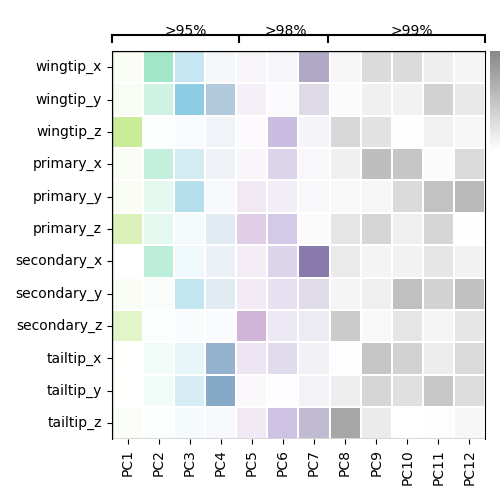

(<Figure size 500x500 with 3 Axes>, <Axes: >)

In [7]:
only_2017 = hawk3d.frames.filter_by(obstacle=True)
pca_input = hawk3d.PCA.get_input(hawk3d.frames.markers[only_2017])

print(pca_input.shape)

pca = PCA()
pca.fit(pca_input)

print(pca.explained_variance_ratio_)

plot_components(hawk3d)

In [8]:
# only_2017 = hawk3d.frames.filter_by(obstacle=True)

pca_input = hawk3d.PCA.get_input(hawk3d.frames.markers)

hawk3d.PCA.run_PCA(pca_input)

hawk3d.PCA.get_score_range()


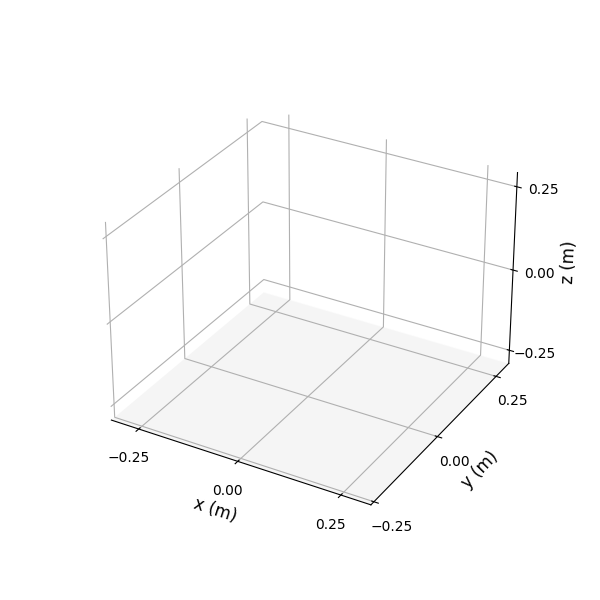

No such comm: 8a777f779d094a8c8e90abb84e0d84cc


In [10]:

plt.close('all')
selected_PCs = [0]
frames = hawk3d.PCA.reconstruct(selected_PCs)

hawk3d.animate_hawk(frames)


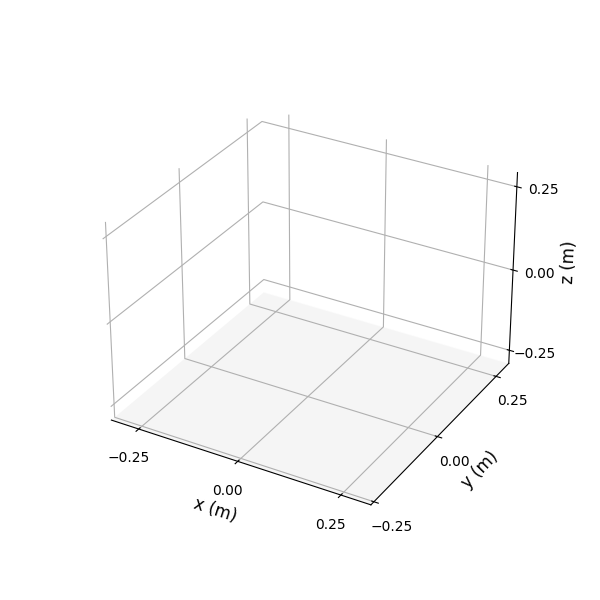

In [11]:
plt.close('all')
hawk3d.quick_PCA()